<B>PRIMER PRACTICO

# 1.Importar librerias y abrir dataset

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from ydata_profiling import ProfileReport

In [76]:
dataSet=pd.read_csv("permisos_construccion_2.csv",low_memory=False)

# 2. Interpretacion

Numero de permiso:
Numero asignado al completar el formulario

Tipo de permiso:
Tipo de representado representado numericamente

Definición de Tipo de Permiso:
Descripción del tipo de permiso, por ejemplo nueva construcción, modificaciones

Fecha de Creación del Permiso:	
Fecha en que se creó el permiso, posterior o igual a la fecha de presentación

Bloque:
Relacionado con la dirección

Lote:
Relacionado con la dirección

Número de Calle:
Relacionado con la dirección

Sufijo de Número de Calle:
Relacionado con la dirección

Nombre de la Calle:
Relacionado con la dirección

Sufijo de Nombre de la Calle:
Relacionado con la dirección

Unidad:
Unidad de un edificio

Sufijo de Unidad:
Sufijo, si hay alguno, para la unidad

Descripción:
Detalles sobre el propósito del permiso. Ejemplo: retejado, renovación de baño

Estado Actual:
Estado actual de la solicitud de permiso

Fecha de Estado Actual:
Fecha en que se ingresó el estado actual

Fecha de Presentación:
Fecha de presentación del permiso

Fecha de Emisión:
Fecha de emisión del permiso

Fecha de Finalización:
Fecha en que se completó el proyecto, aplicable si Estado Actual = "completado"

Fecha del Primer Documento de Construcción:
Fecha en que se documentó la construcción

Notificación Estructural:
Notificación para cumplir con alguna necesidad legal, otorgada o no

Número de Pisos Existentes:
Número de pisos existentes en el edificio. No aplicable para ciertos tipos de permisos

Número de Pisos Propuestos:
Número de pisos propuestos para la construcción/modificación

Reforzamiento Voluntario de Pisos Blandos:
Reforzamiento de piso blando para cumplir con regulaciones sísmicas

Permiso Solo de Incendios:
Permiso relacionado con la prevención de riesgos de incendio

Fecha de Vencimiento del Permiso:
Fecha de vencimiento relacionada con el permiso emitido

Costo Estimado:
Estimación inicial del costo del proyecto

Costo Revisado:
Estimación revisada del costo del proyecto

Uso Existente:
Uso actual del edificio

Unidades Existentes:
Número actual de unidades

Uso Propuesto:
Uso propuesto del edificio

Unidades Propuestas:
Número propuesto de unidades

Juegos de Planos:
Representación del plan que indica el diseño general de la fundación

Cumplimiento TIDF:
Cumplimiento con TIDF o no, este es un nuevo requisito legal

Tipo de Construcción Existente:
Tipo de construcción existente, categorizado numéricamente

Descripción del Tipo de Construcción Existente:
Descripción del tipo anterior, por ejemplo, madera u otros tipos de construcción

Tipo de Construcción Propuesto:
Tipo de construcción propuesto, categorizado numéricamente

Descripción del Tipo de Construcción Propuesto:
Descripción del tipo anterior

Permiso de Sitio:
Permiso para sitio

Distrito del Supervisor:
Distrito del supervisor al que pertenece la ubicación del edificio

Barrios - Límites de Análisis:
Barrio al que pertenece la ubicación del edificio

Código Postal:
Código postal de la dirección del edificio

Ubicación:
Ubicación en par de coordenadas de latitud y longitud

ID de Registro:
Alguna identificación, no útil para esto

# 3. Analisis Exploratorio

a) Tamaño

Utilizaremos la funcion shape para poder vizualizar el tamaño del dataset, la primera coordenada son la cantidad de filas y la segunda la cantidad de columnas

In [77]:
dataSet.shape

(198910, 43)

Como se puede observar, tenemos 198910 filas y 43 columnas

b)  Mostrar primeras filas

In [78]:
dataSet.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,M394467,8,otc alterations permit,5/15/2013,3751,172,300,0,03rD,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.304810e+12
1,2.01505E+11,8,otc alterations permit,5/22/2015,3556,6,328,A,gUeRrErO,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,8,Mission,94103.0,"(37.765906581390105, -122.42453043666066)",1.382530e+12
2,M798247,8,otc alterations permit,6/16/2017,655,61,2426,A,pInE,St,...,NaN,NaN,NaN,NaN,NaN,2,Pacific Heights,94115.0,"(37.78788490521045, -122.43641930200963)",1.467270e+12
3,2.01308E+11,8,otc alterations permit,8/16/2013,4267,29,2607,A,bRyAnT,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9,Mission,94110.0,"(37.75241643936911, -122.40877419451499)",1.314500e+12
4,2.01307E+11,8,otc alterations permit,7/26/2013,1518,37,535,A,26tH,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,1,Outer Richmond,94121.0,"(37.77928233382438, -122.48608415176169)",1.312290e+12


c) Datos faltantes por fila

In [79]:
dataSet.isnull().sum()*100/len(dataSet)

Permit Number                              0.000000
Permit Type                                0.000000
Permit Type Definition                     0.000000
Permit Creation Date                       0.000000
Block                                      0.000000
Lot                                        0.000000
Street Number                              0.000000
Street Number Suffix                      98.885928
Street Name                                0.000000
Street Suffix                              1.391584
Unit                                      85.179227
Unit Suffix                               99.014127
Description                                0.145795
Current Status                             0.000000
Current Status Date                        0.000000
Filed Date                                 0.000000
Issued Date                                7.511940
Completed Date                            51.136192
First Construction Document Date           7.514957
Structural N

Los primeros datos que vemos con varios nulos son la unidad, el sufijo de la unidad y el sufijo del numero de calle (Street Number Suffix, Unit, Unit Suffix). Esta informacion puede no corresponder a ciertas ubicaciones y por eso es que hay varios valores nulos. Ademas, puede que hayan puesto esta informacion en la direccion directamente, sin dividir por categoria o tambien puede ser que no sepan esta informacion especifica al rellenar el formulario.

Luego, la fecha de finalizacion tiene la mitad con nulos, esto problablemente se deba a que los trabajos no han sido completados. Vemos que si hacemos la comparacion del estado con la fecha de completado, los que tienen fecha la gran mayoria se encuentran completados y los que no tienen fecha ninguno de ellos esta completo.

In [80]:
estado_sin_fecha = dataSet[dataSet['Completed Date'].isna()]['Current Status'].value_counts()
estado_con_fecha = dataSet[dataSet['Completed Date'].notna()]['Current Status'].value_counts()

In [81]:
print(estado_sin_fecha)

Current Status
issued         83510
filed          12045
withdrawn       1754
cancelled       1531
expired         1363
approved         728
reinstated       527
suspend          190
revoked           46
plancheck         16
disapproved        2
appeal             2
incomplete         1
Name: count, dtype: int64


In [82]:
print(estado_con_fecha)

Current Status
complete      97081
issued           53
reinstated       36
expired           7
cancelled         5
approved          5
revoked           4
suspend           3
incomplete        1
Name: count, dtype: int64



En el caso de Notificacion estructural, reforzmiento voluntario de pisos blandos, permiso de incendios, cumplimiento TIDF y permiso de sitio (Structural Notification, Voluntary Soft-Story Retrofit, Fire Only Permit, TIDF Compliance, Site Permit) al ser variables booleanas, el no se deja como vacio y por eso hay tantos null.

In [83]:
dataSet['Structural Notification'].value_counts()

Structural Notification
Y    6922
Name: count, dtype: int64

e, f, g) 

Variables Discretas:
- `Permit Type`
- `Permit Type Definition`
- `Current Status`
- `Structural Notification` <--

- `Voluntary Soft-Story Retrofit` <--

- `Fire Only Permit` <--

- `Existing Use` 




- `tidf compliance` <--
 

- `site permit` <--

    Permit Type and Definition

Las 2 primeras variables discretas son el tipo de permiso y su descripcion

In [84]:
dataSet['Permit Type'].value_counts(dropna=False)

Permit Type
8    178852
3     14664
4      2892
2       950
6       600
7       511
1       350
5        91
Name: count, dtype: int64

In [85]:
dataSet['Permit Type Definition'].value_counts()

Permit Type Definition
otc alterations permit                 178836
additions alterations or repairs        14663
sign - erect                             2892
new construction wood frame               950
demolitions                               600
wall or painted sign                      511
new construction                          347
grade or quarry or fill or excavate        91
 otc alterations permit                     8
otc alterations permit #                    8
new construction #                          2
 new construction                           1
 additions alterations or repairs           1
Name: count, dtype: int64

Como se puede observar, el tipo de permiso tiene valores que van del 1 al 8. La descripcion del tipo de permiso se deberia de corresponder con algun numero, pero se nota que hay mas definiciones. Esto se debe a que las definiciones, a pesar de significar lo mismo tienen algun caracter de diferencia por lo que las pone en lugares distintos.

Si agrupamos los numeros y que definicion tiene cada uno, se observa lo siguiente:

In [86]:
grupos=dataSet.groupby('Permit Type')['Permit Type Definition'].unique()
for i,v in enumerate(grupos):
    print(f"Permiso {i+1}")
    print(v)

Permiso 1
['new construction' ' new construction ' 'new construction #']
Permiso 2
['new construction wood frame']
Permiso 3
['additions alterations or repairs' ' additions alterations or repairs ']
Permiso 4
['sign - erect']
Permiso 5
['grade or quarry or fill or excavate']
Permiso 6
['demolitions']
Permiso 7
['wall or painted sign']
Permiso 8
['otc alterations permit' ' otc alterations permit '
 'otc alterations permit #']


Habria que modificar las definiciones de permiso 1, 3 y 8 para que concuerden, estandarizar los no comunes

In [87]:
value_counts = dataSet['Permit Type'].value_counts()

# Separate the values and frequencies into two arrays
values_array = value_counts.index.to_numpy()


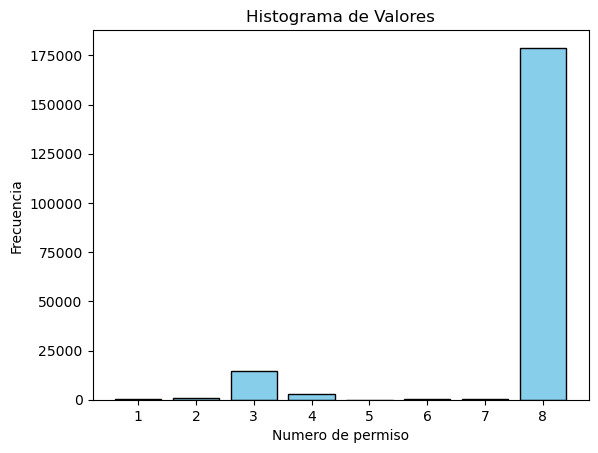

In [88]:

plt.bar(values_array,value_counts, color='skyblue', edgecolor='black')
plt.title('Histograma de Valores')
plt.xlabel('Numero de permiso')
plt.ylabel('Frecuencia')

plt.show()

    Current Status

El estado actual tambien es una variable discreta y tiene 14 valores distinitos, los cuales todos parecen correctos y no se repiten de manera extraña 

In [89]:
dataSet['Current Status'].value_counts()

Current Status
complete       97081
issued         83563
filed          12045
withdrawn       1754
cancelled       1536
expired         1370
approved         733
reinstated       563
suspend          193
revoked           50
plancheck         16
incomplete         2
disapproved        2
appeal             2
Name: count, dtype: int64

In [90]:
value_counts = dataSet['Current Status'].value_counts()
values_array = value_counts.index.to_numpy()


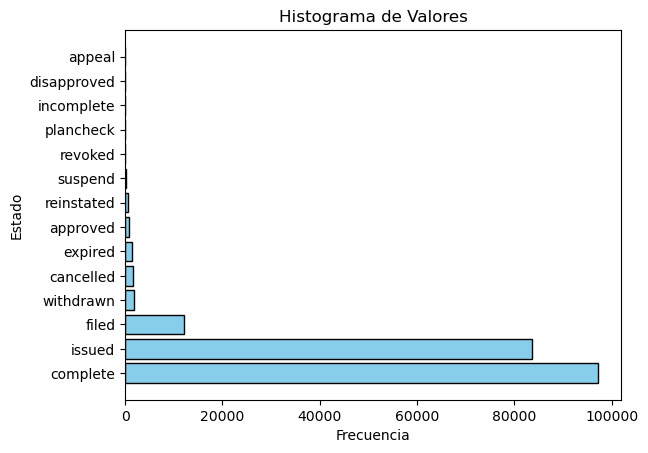

In [91]:
plt.barh(values_array,value_counts, color='skyblue', edgecolor='black')
plt.title('Histograma de Valores')
plt.ylabel('Estado')
plt.xlabel('Frecuencia')

plt.show()

    Binarias

Las variables discretas Voluntary Soft-Story Retrfit, Structural Notification, Fire Only Permit, Site Permit y TIDF Compliance son variables binarias, por lo tanto sus posibles valores son si o no, en este caso el no se representa con el nulo.


In [92]:
dataSet['Structural Notification'].value_counts()

Structural Notification
Y    6922
Name: count, dtype: int64

In [93]:
value_counts = dataSet['Structural Notification'].value_counts(dropna=False)
values_array=['N','Y']


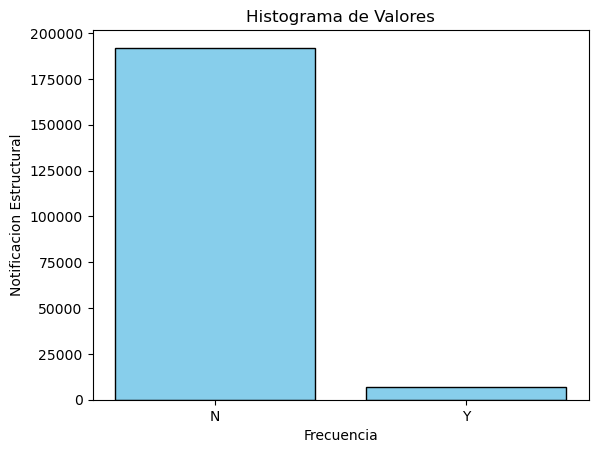

In [94]:
plt.bar(values_array,value_counts, color='skyblue', edgecolor='black')
plt.title('Histograma de Valores')
plt.ylabel('Notificacion Estructural')
plt.xlabel('Frecuencia')

plt.show()

In [95]:
dataSet['Voluntary Soft-Story Retrofit'].value_counts()

Voluntary Soft-Story Retrofit
Y    35
Name: count, dtype: int64

In [96]:
value_counts = dataSet['Voluntary Soft-Story Retrofit'].value_counts(dropna=False)
values_array=['N','Y']

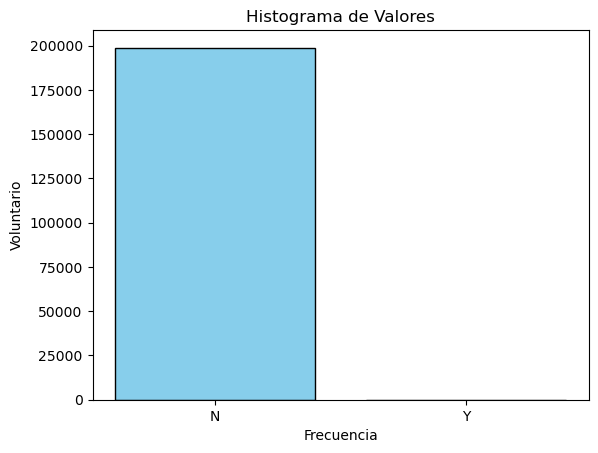

In [97]:
plt.bar(values_array,value_counts, color='skyblue', edgecolor='black')
plt.title('Histograma de Valores')
plt.ylabel('Voluntario')
plt.xlabel('Frecuencia')

plt.show()

In [98]:
dataSet['Fire Only Permit'].value_counts()

Fire Only Permit
Y    18828
Name: count, dtype: int64

In [99]:
value_counts = dataSet['Fire Only Permit'].value_counts(dropna=False)
values_array=['N','Y']

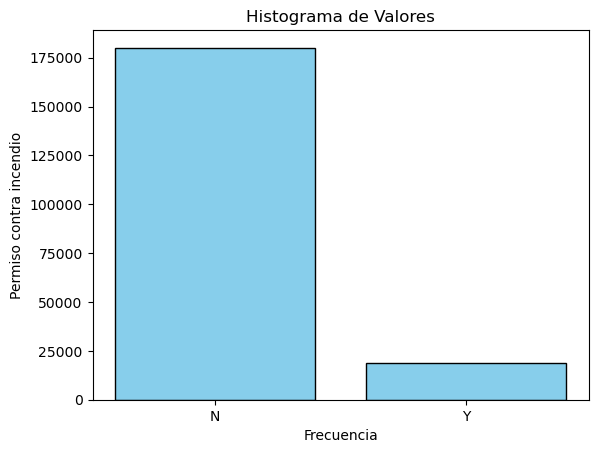

In [100]:
plt.bar(values_array,value_counts, color='skyblue', edgecolor='black')
plt.title('Histograma de Valores')
plt.ylabel('Permiso contra incendio')
plt.xlabel('Frecuencia')

plt.show()

In [101]:
dataSet['Site Permit'].value_counts()

Site Permit
Y    5360
Name: count, dtype: int64

In [102]:
value_counts = dataSet['Site Permit'].value_counts(dropna=False)
values_array=['N','Y']

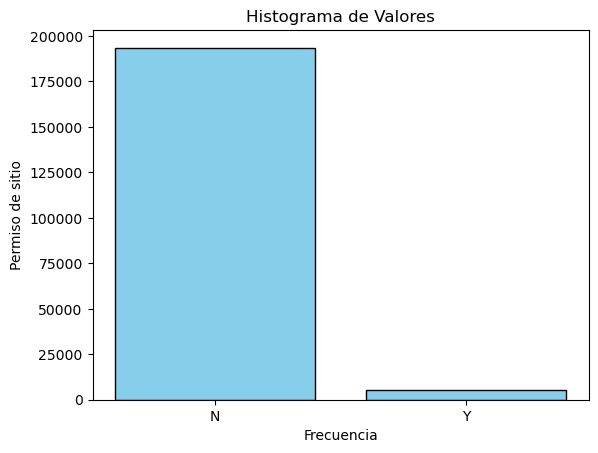

In [103]:
plt.bar(values_array,value_counts, color='skyblue', edgecolor='black')
plt.title('Histograma de Valores')
plt.ylabel('Permiso de sitio')
plt.xlabel('Frecuencia')

plt.show()

En el caso de TIDF Compliance ademas aparece una P, la cual nosotros suponemos que significa positivo.

In [104]:
dataSet['TIDF Compliance'].value_counts()

TIDF Compliance
P    1
Y    1
Name: count, dtype: int64

# 4.  Limpieza de datos

La primera decision que tomaremos es estandarizar el Permit Type Definition, donde, el numero de permiso solo tenga una definicion.Esto lo haremos en los tipos de permisos 1, 3 y 8

In [105]:
filtro1=dataSet['Permit Type'] == 1
dataSet.loc[filtro1, 'Permit Type Definition'] = "new construction"
filtro3=dataSet['Permit Type'] == 3
dataSet.loc[filtro3, 'Permit Type Definition'] = "additions alterations or repairs"
filtro8=dataSet['Permit Type'] == 8
dataSet.loc[filtro8, 'Permit Type Definition'] = "otc alterations permit"


In [106]:
grupos=dataSet.groupby('Permit Type')['Permit Type Definition'].unique()
for i,v in enumerate(grupos):
    print(f"Permiso {i+1}")
    print(v)

Permiso 1
['new construction']
Permiso 2
['new construction wood frame']
Permiso 3
['additions alterations or repairs']
Permiso 4
['sign - erect']
Permiso 5
['grade or quarry or fill or excavate']
Permiso 6
['demolitions']
Permiso 7
['wall or painted sign']
Permiso 8
['otc alterations permit']


dataSet.

La siguiente columna a tratar seria la de Street Name, que si vemos los datos, tiene nombes con mayusculas y minusculas.

In [107]:
dataSet["Street Name"]

0              03rD
1          gUeRrErO
2              pInE
3            bRyAnT
4              26tH
            ...    
198905         20tH
198906     mArIpOsA
198907    sAn bRuNo
198908     bRoAdWaY
198909       mArKeT
Name: Street Name, Length: 198910, dtype: object

In [108]:
dataSet["Street Name"]=dataSet["Street Name"].str.lower()
dataSet["Street Name"]

0              03rd
1          guerrero
2              pine
3            bryant
4              26th
            ...    
198905         20th
198906     mariposa
198907    san bruno
198908     broadway
198909       market
Name: Street Name, Length: 198910, dtype: object

Las proximas columnas seran las booleanas, tomaremos el nulo como un no, por lo que sustituiremos esos valores

In [122]:
filtroSN=dataSet['Structural Notification'].isnull()
dataSet.loc[filtroSN, 'Structural Notification'] = "N"
filtroVR=dataSet['Voluntary Soft-Story Retrofit'].isnull()
dataSet.loc[filtroVR, 'Voluntary Soft-Story Retrofit'] = "N"
filtroFO=dataSet['Fire Only Permit'].isnull()
dataSet.loc[filtroFO, 'Fire Only Permit'] = "N"
filtroSP=dataSet['Site Permit'].isnull()
dataSet.loc[filtroSP, 'Site Permit'] = "N"
filtroSP=dataSet['TIDF Compliance'].isnull()
dataSet.loc[filtroSP, 'TIDF Compliance'] = "N"


# 5. Normalización de datos

a)

In [117]:
columnas_numericas = ['Estimated Cost', 'Revised Cost', 'Number of Existing Stories', 'Number of Proposed Stories']
scaler = MinMaxScaler()
dataSet[columnas_numericas] = scaler.fit_transform(dataSet[columnas_numericas])
print(dataSet[columnas_numericas].value_counts())



Estimated Cost  Revised Cost  Number of Existing Stories  Number of Proposed Stories
0.000000        1.281230e-09  0.038462                    0.038462                      4638
                              0.025641                    0.025641                      3909
                              0.051282                    0.051282                      1626
0.000009        6.406150e-06  0.025641                    0.025641                      1576
0.000019        1.281230e-05  0.025641                    0.025641                      1430
                                                                                        ... 
0.000023        1.665599e-05  0.025641                    0.025641                         1
                1.601537e-05  0.512821                    0.512821                         1
                1.591160e-05  0.025641                    0.025641                         1
                1.590903e-05  0.025641                    0.025641            

b)

El normalizar los datos permite que los valores muy grandes no dominen el modelo,ademas al estar acotado permite que se puedan delimitar los margenes con mayor facilidad en los algoritmos. Una utilidad de la normalizacion es que mejora la visualizacion de los datos a la hora de graficar, sobretodo cuando hay diferencias muy grandes en los valores.

# 6. Utilizar la librería de Data Profiling vista en el curso y comparar las 

In [120]:
original_df = pd.read_csv("permisos_construccion_2.csv",low_memory=False)
dp = ProfileReport(original_df,title="Reporte", explorative=True)
dp.to_file(output_file="Profiling_html.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]